# Projet Fraude 



In [2]:
import warnings
warnings.simplefilter('ignore')
from IPython.display import clear_output
#autres

### Importer les dataset

In [28]:
#target --> class : 1 Fraud | 0 ok 
import pandas as pd 
import seaborn as sns
users = pd.read_csv('Fraud_Data.csv'); 
ips = pd.read_csv('IpAddress_to_Country.csv'); 
#users = users.sample(1000)

In [4]:
ips

,lower_bound_ip_address,upper_bound_ip_address,country
0,1.677722e+07,16777471,Australia
1,1.677747e+07,16777727,China
2,1.677773e+07,16778239,China
3,1.677824e+07,16779263,Australia
4,1.677926e+07,16781311,China
...,...,...,...
138841,3.758092e+09,3758093311,Hong Kong
138842,3.758093e+09,3758094335,India
138843,3.758095e+09,3758095871,China
138844,3.758096e+09,3758096127,Singapore


### Créer une nouvelle colonne `country` en effectuant une jointure entre les deux dataset 

In [5]:
#vMin = min(ips.lower_bound_ip_address)
#vMax = min(ips.upper_bound_ip_address)
#total = len(users);
#count = 0
#for (i, user) in users.iterrows():
#    clear_output(wait=True)
#    count = count + 1
#    print (str(count) + '/' + str(total) )
#    if not vMin <= user.ip_address <= vMax:
#        pass
#    test = ips[(ips['lower_bound_ip_address'] <= user.ip_address) & (ips['upper_bound_ip_address'] >= user.ip_address)]
#    countries = test.groupby('country').groups;
#    if len(countries.keys()) > 0:
#        users.loc[i, 'country'] = list(countries.keys())[0]
#
#users

1000/1000


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
19545,278119,2015-02-01 14:50:23,2015-05-25 08:06:04,33,WWHUCKDKNHUJG,Ads,Chrome,F,23,1.091662e+08,0,United States
83766,127911,2015-05-02 02:01:50,2015-06-20 07:52:07,56,XZPEVZYOFDOWT,SEO,Safari,F,34,8.409750e+08,0,United States
37386,263855,2015-01-26 22:00:39,2015-02-17 01:39:52,34,GASGEONKMDKJH,Direct,Chrome,F,22,3.539711e+09,0,Japan
109163,280670,2015-07-24 14:24:37,2015-08-22 11:33:48,46,LCXBIIUPVWMEW,SEO,Chrome,F,23,9.472075e+07,1,Russian Federation
30824,307348,2015-02-18 02:26:37,2015-05-30 21:32:36,53,POOXDWYYQFZQC,Ads,Safari,F,44,4.077807e+09,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
56015,1392,2015-04-07 14:26:19,2015-07-30 04:56:39,37,CRHWESJXBPRXB,SEO,Chrome,M,34,3.141735e+09,0,Brazil
60975,236722,2015-02-08 19:01:14,2015-06-04 14:33:25,56,MJGTBFNREXKSJ,SEO,FireFox,F,31,4.249504e+08,0,United Kingdom
127905,233972,2015-01-01 17:10:09,2015-02-10 05:54:37,22,IUQRNPGMQEMZV,Ads,Safari,F,60,3.346025e+09,0,United States
95441,283750,2015-01-20 06:59:08,2015-03-18 16:07:36,17,VZQLQSJIOVNWF,Direct,IE,M,32,3.860009e+09,0,NaN


In [29]:
countries = []
for i in range(len(users)):
    ip_address = users.loc[i, 'ip_address']
    tmp = ips[(ips["lower_bound_ip_address"] <= ip_address) & (ips["upper_bound_ip_address"] >= ip_address)]
    
    if len(tmp) == 1:
        countries.append(tmp["country"].values[0])
    else:
        countries.append('NA')
        
users["country"] = countries
users

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,NA
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States
...,...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,43,XPSKTWGPWINLR,SEO,Chrome,M,28,3.451155e+09,1,United States
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,SEO,Safari,M,32,2.439047e+09,0,Netherlands
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,MEQHCSJUBRBFE,SEO,IE,F,26,2.748471e+09,0,Japan
151110,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,46,CMCXFGRHYSTVJ,SEO,Chrome,M,37,3.601175e+09,0,United States


### Créer une nouvelle variable `time_diff` qui sera la différence entre les variables `purchase_time` et `signup_time`

In [47]:
users['time_diff'] = 0
users['time_diff'] = (pd.to_datetime(users['purchase_time']) - pd.to_datetime(users['signup_time'])).apply(lambda x: x.seconds)
users

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,device_num,ip_num,signup_day,signup_week,purchase_day,purchase_week,time_diff
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,1,1,1,9,5,16,13882
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,1,1,6,23,0,24,17944
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,12,12,3,1,3,1,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,NA,1,1,1,18,0,19,60085
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,1,1,1,30,2,37,41461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,43,XPSKTWGPWINLR,SEO,Chrome,M,28,3.451155e+09,1,United States,2,1,1,5,6,13,77233
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,SEO,Safari,M,32,2.439047e+09,0,Netherlands,1,1,4,20,1,22,67270
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,MEQHCSJUBRBFE,SEO,IE,F,26,2.748471e+09,0,Japan,1,1,1,10,2,21,28816
151110,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,46,CMCXFGRHYSTVJ,SEO,Chrome,M,37,3.601175e+09,0,United States,2,1,3,28,0,37,48519


In [ ]:
users.head()

### Regroupper les `user_id` par `device_id`  afin d'avoir le nombre de device par client  

In [31]:
device_num = users[['user_id', 'device_id']].groupby('device_id').count().reset_index()
 
device_num = device_num.rename(columns={'user_id': 'device_num'})
users = users.merge(device_num, how='left', on='device_id')

In [42]:
users.sort_values(by='device_num', ascending=False)

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,device_num
72653,1056,2015-01-10 23:23:35,2015-01-10 23:23:36,38,ITUMJCKWEYNDD,Ads,Safari,M,43,3.874758e+09,1,NA,20
50877,293871,2015-01-04 15:01:52,2015-01-04 15:01:53,32,CQTUVBYIWWWBC,SEO,IE,F,42,3.484934e+08,1,United States,20
75008,124779,2015-01-03 10:47:38,2015-01-03 10:47:39,58,KIPFSCNUGOLDP,SEO,Safari,F,36,5.760609e+08,1,United States,20
96193,326970,2015-01-03 13:10:48,2015-01-03 13:10:49,42,NGQCKIADMZORL,SEO,FireFox,F,34,2.050964e+09,1,New Zealand,20
114889,10019,2015-01-03 13:10:34,2015-01-03 13:10:35,42,NGQCKIADMZORL,SEO,FireFox,F,34,2.050964e+09,1,New Zealand,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53754,49491,2015-01-13 16:33:03,2015-04-17 05:10:27,24,KOQVMYALUCUNX,Ads,Chrome,M,30,6.190285e+08,0,Taiwan; Republic of China (ROC),1
53753,101371,2015-04-21 20:26:05,2015-05-30 10:36:23,32,JLAPNZFHDNQDW,Ads,IE,F,39,1.962765e+09,0,China,1
53752,48088,2015-04-02 00:15:41,2015-07-23 01:33:07,56,DIZHATKUTAXIE,SEO,IE,F,51,1.210845e+09,0,United States,1
53750,175362,2015-04-05 22:24:57,2015-06-19 12:50:46,9,JOYQWHMAIIECS,SEO,Opera,M,22,4.256088e+09,0,NA,1


### Faire de même pour les `ip_address` 

In [44]:
#ip_num = users[['user_id', 'ip_address']].groupby('ip_address').count().reset_index()
#ip_num = ip_num.rename(columns={'user_id': 'ip_num'})
#users = users.merge(ip_num, how='left', on='ip_address')
users

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,device_num,ip_num
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,1,1
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,1,1
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,12,12
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,NA,1,1
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,43,XPSKTWGPWINLR,SEO,Chrome,M,28,3.451155e+09,1,United States,2,1
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,SEO,Safari,M,32,2.439047e+09,0,Netherlands,1,1
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,MEQHCSJUBRBFE,SEO,IE,F,26,2.748471e+09,0,Japan,1,1
151110,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,46,CMCXFGRHYSTVJ,SEO,Chrome,M,37,3.601175e+09,0,United States,2,1


### Traiter les variables `signup_time` & `purchase_time` afin de les différentier suivant la semaine et le week end  

In [46]:
# Signup day and week
users['signup_day'] = pd.to_datetime(users['signup_time']).apply(lambda x: x.dayofweek)
users['signup_week'] = pd.to_datetime(users['signup_time']).apply(lambda x: x.week)
# Purchase day and week
users['purchase_day'] = pd.to_datetime(users['purchase_time']).apply(lambda x: x.dayofweek)
users['purchase_week'] = pd.to_datetime(users['purchase_time']).apply(lambda x: x.week)
users

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,device_num,ip_num,signup_day,signup_week,purchase_day,purchase_week
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,1,1,1,9,5,16
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,1,1,6,23,0,24
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,12,12,3,1,3,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,NA,1,1,1,18,0,19
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,1,1,1,30,2,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,43,XPSKTWGPWINLR,SEO,Chrome,M,28,3.451155e+09,1,United States,2,1,1,5,6,13
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,SEO,Safari,M,32,2.439047e+09,0,Netherlands,1,1,4,20,1,22
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,MEQHCSJUBRBFE,SEO,IE,F,26,2.748471e+09,0,Japan,1,1,1,10,2,21
151110,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,46,CMCXFGRHYSTVJ,SEO,Chrome,M,37,3.601175e+09,0,United States,2,1,3,28,0,37


### Définir vos variables de travail (X,y)

In [65]:
X = users[['country','device_num','ip_num','signup_day','purchase_day', 'time_diff']]
y = users['class']

### Afficher les informations du dataset afin de vizualiser les variables numeriques et categoriques

In [63]:
X,y

(              country  device_num  ip_num  signup_day  purchase_day  \
 0               Japan           1       1           1             5   
 1       United States           1       1           6             0   
 2       United States          12      12           3             3   
 3                  NA           1       1           1             0   
 4       United States           1       1           1             2   
 ...               ...         ...     ...         ...           ...   
 151107  United States           2       1           1             6   
 151108    Netherlands           1       1           4             1   
 151109          Japan           1       1           1             2   
 151110  United States           2       1           3             0   
 151111             NA           1       1           2             1   
 
         time_diff country_encoded  
 0           13882                  
 1           17944                  
 2               1     

### Traiter les variables catégoriques

In [67]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
X.country = label_encoder.fit_transform(X.country)
X

,country,device_num,ip_num,signup_day,purchase_day,time_diff
0,84,1,1,1,5,13882
1,172,1,1,6,0,17944
2,172,12,12,3,3,1
3,115,1,1,1,0,60085
4,172,1,1,1,2,41461
...,...,...,...,...,...,...
151107,172,2,1,1,6,77233
151108,119,1,1,4,1,67270
151109,84,1,1,1,2,28816
151110,172,2,1,3,0,48519


### Spliter vos variables 

In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.30, random_state=42)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((105778, 6), (45334, 6), (105778,), (45334,))

### Instancier un `RandomForestClassifier` et l'entrainer sur vos données 

In [72]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10)
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)

### Afficher l'accuracy moyenne pour 10 'fold cross validation'

In [75]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_train, Y_train, scoring='accuracy').mean()
scores

0.9419822690913777

### Afficher les `feature_importances_`

In [84]:
feature_imp = pd.Series(clf.feature_importances_,index=['country','device_num','ip_num','signup_day','purchase_day', 'time_diff']).sort_values(ascending=False)
feature_imp

time_diff       0.642536
ip_num          0.214781
country         0.054057
device_num      0.049086
signup_day      0.025194
purchase_day    0.014347
dtype: float64

### Vizualiser les sur un graphique 

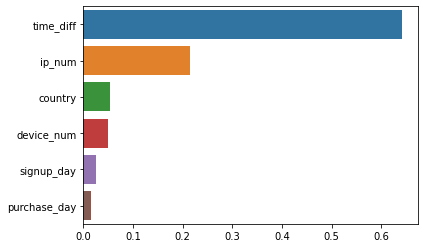

In [93]:
import seaborn as sns
ax = sns.barplot(y=feature_imp.keys(), x=feature_imp.values,orient='h')

### Afficher le `Classification report`

In [102]:
from sklearn.metrics import classification_report

classification_report(_train.values, Y_test.values)

ValueError: Found input variables with inconsistent numbers of samples: [105778, 45334]

### Traçer la courbe AUC 

### Afficher la matrice de confusion 
Qu'en pensez vous ? 

### Faire une selection de certaine variables et spliter vos varibales 

### Entrainer un classifieur `LogisticRegression` sur ces variables 